Business requirment 5000 songs

# Development unsupervised Machine Learning Moosic Model

# Model 1
x="energy", y="acousticness"

In [104]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
#reading the date frame and checking the content

moosic_5000songs = pd.read_csv("df_audio_features_5000_cleaned_whitespaces.csv")
moosic_5000songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


Activity

# Cleaning and scaling data frame

In [106]:
# Drop multiple columns, cleaning the date frame from the not relevant coloumns 'time_signature', 'id', 'html'

# Create the list of columns to drop

columns_to_drop = ['time_signature', 'id', 'html']

# Drop the specified columns and create a new DataFrame without them

moosic_5000songs = moosic_5000songs.drop(columns=columns_to_drop)
moosic_5000songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680


In [107]:
# Control check the column names in DataFrame due to expected KeyError
print(moosic_5000songs.columns)

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms'],
      dtype='object')


In [108]:
# Data frame data type check
moosic_5000songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5235 non-null   object 
 1   artist            5235 non-null   object 
 2   danceability      5235 non-null   float64
 3   energy            5235 non-null   float64
 4   key               5235 non-null   int64  
 5   loudness          5235 non-null   float64
 6   mode              5235 non-null   int64  
 7   speechiness       5235 non-null   float64
 8   acousticness      5235 non-null   float64
 9   instrumentalness  5235 non-null   float64
 10  liveness          5235 non-null   float64
 11  valence           5235 non-null   float64
 12  tempo             5235 non-null   float64
 13  type              5235 non-null   object 
 14  duration_ms       5235 non-null   int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 613.6+ KB


Activity

# Histogram plotting to check corelation between data sets to be used for K-Clustering

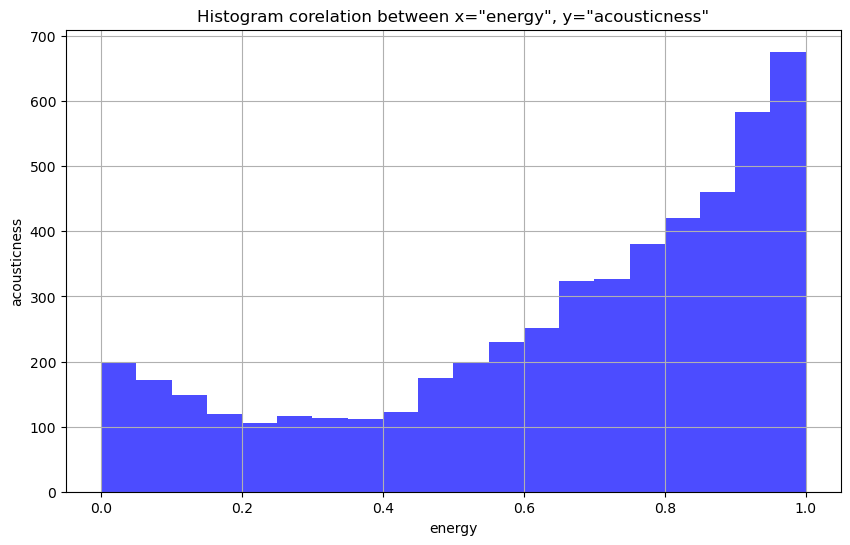

In [109]:
# Ploting original clustered dataframe with two values data x="energy", y="acousticness"

plot_data = pd.DataFrame(moosic_5000songs)

# Create a bar plot

plt.figure(figsize=(10, 6))
plt.hist(plot_data['energy'], bins=20, color='blue', alpha=0.7)
plt.xlabel('energy')
plt.ylabel('acousticness')
plt.title('Histogram corelation between x="energy", y="acousticness"')
plt.grid(True)
plt.show()

In [110]:
# x="energy", y="acousticness" are showing positive corelation and will be used for clustering

Activity 
# Data scaling Transformers, Quantile transformer

Transformers change the distribution to more closely resemble a normal distribution. Data that conforms to the normal distribution in machine learning is advantageous for model construction since it simplifies the maths.

In [111]:
# First we will create exploration data frame with 2 data set

moosic_5000songs_scaled = moosic_5000songs[["energy","acousticness"]]
moosic_5000songs_scaled.head()

,energy,acousticness
0,0.2590,0.694
1,0.3990,0.217
2,0.7300,0.453
3,0.0502,0.879
4,0.1190,0.916


In [112]:
# Import Quantile Transformer
from sklearn.preprocessing import QuantileTransformer

# Create DataFrame of Quantile transformed values
moosic_5000songs_scaled_quantile = QuantileTransformer(n_quantiles=len(moosic_5000songs_scaled.iloc[:,-1])).fit_transform(moosic_5000songs_scaled)
with_age_quantile = pd.DataFrame(moosic_5000songs_scaled_quantile, columns=moosic_5000songs_scaled.columns, index=moosic_5000songs_scaled.index)

# Display age column of original DataFrame and age column of Quantile DataFrame to compare
pd.DataFrame({
    'original': moosic_5000songs_scaled.iloc[:,-1],
    'quantile_transformed': with_age_quantile.iloc[:,-1]
}).sort_values(by='original')

,original,quantile_transformed
3643,0.000,0.0
3414,0.000,0.0
3453,0.000,0.0
3849,0.000,0.0
3928,0.000,0.0
...,...,...
2097,0.996,1.0
2099,0.996,1.0
1928,0.996,1.0
1974,0.996,1.0


In [113]:
# Data exploration

moosic_5000songs_scaled.describe()

,energy,acousticness
count,5235.000000,5235.000000
mean,0.653565,0.290043
std,0.288335,0.355985
min,0.000000,0.000000
25%,0.479000,0.002450
50%,0.738000,0.095400
75%,0.893000,0.565500
max,1.000000,0.996000


In [114]:
with_age_quantile.describe()

,energy,acousticness
count,5235.000000,5235.000000
mean,0.500003,0.500004
std,0.288758,0.288769
min,0.000000,0.000000
25%,0.250096,0.250000
50%,0.500191,0.500000
75%,0.749809,0.750000
max,1.000000,1.000000


Activity

# Plotting data frame and relation between values in data frame.
# Decission making on optimal number of clusters look also in to doc "Choosing_right_number_clusters.ipynb"

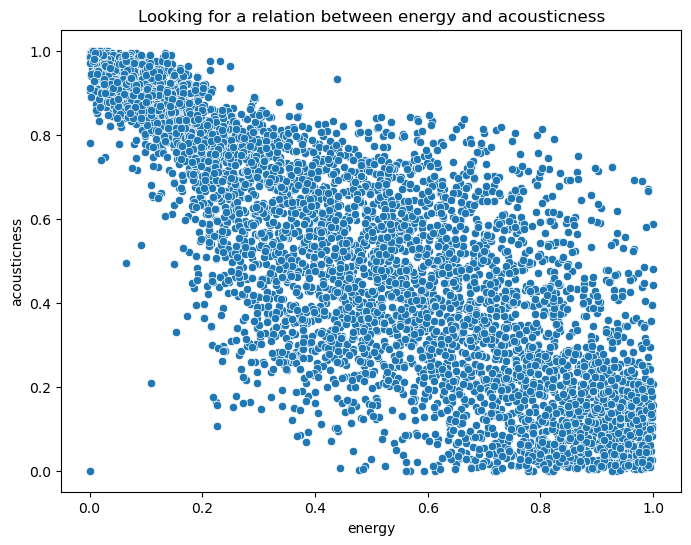

In [115]:
# Ploting relation between two values to decide optimum number of clusters. This activitz was combined with the  "Intertia chosing the right numbers of the clusters"
# From the scatterplot bellow is visible that data frame might be devided in app. from 70 to 20 clusters, but we decided to devided it in 10 clusters due to the recomendations from The Elbow / Inertia methods 
# that suggested 10 clusters for the Moosic data frame based on the "energy","acousticness" data inputs
# Inertia for max_k = 100 shows that optimal number of clusters is 10


fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=with_age_quantile, x="energy", y="acousticness")
plt.title("Looking for a relation between energy and acousticness")
plt.show()

Activity

# K-means calculation x="energy", y="acousticness"

In [116]:
# K-means calculation

from sklearn.cluster import KMeans

# Based on the quick look to the scatter plot, and recomendation from intertia

# we are going to assume there can be 10 different genre based on the data set x="energy", y="acousticness"

kmeans = KMeans(n_clusters=10)
kmeans.fit(with_age_quantile)

KMeans(n_clusters=10)

In [117]:
# K-menas values (centroids / kluster means) are in array and has to be transformed in data frame

kmeans.cluster_centers_

array([[0.91287343, 0.10605503],
       [0.23946493, 0.75971596],
       [0.59047126, 0.39876543],
       [0.49486905, 0.6645343 ],
       [0.08309367, 0.91795938],
       [0.40269868, 0.28181739],
       [0.32575589, 0.52594888],
       [0.70238436, 0.12680731],
       [0.83426388, 0.3300282 ],
       [0.73382401, 0.61022865]])

In [118]:
# Creating data frame from centroids cl_pos = positions

cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ["energy","acousticness"]
cl_pos

,energy,acousticness
0,0.912873,0.106055
1,0.239465,0.759716
2,0.590471,0.398765
3,0.494869,0.664534
4,0.083094,0.917959
5,0.402699,0.281817
6,0.325756,0.525949
7,0.702384,0.126807
8,0.834264,0.330028
9,0.733824,0.610229


Activity

# Plot and explore our KMeans results

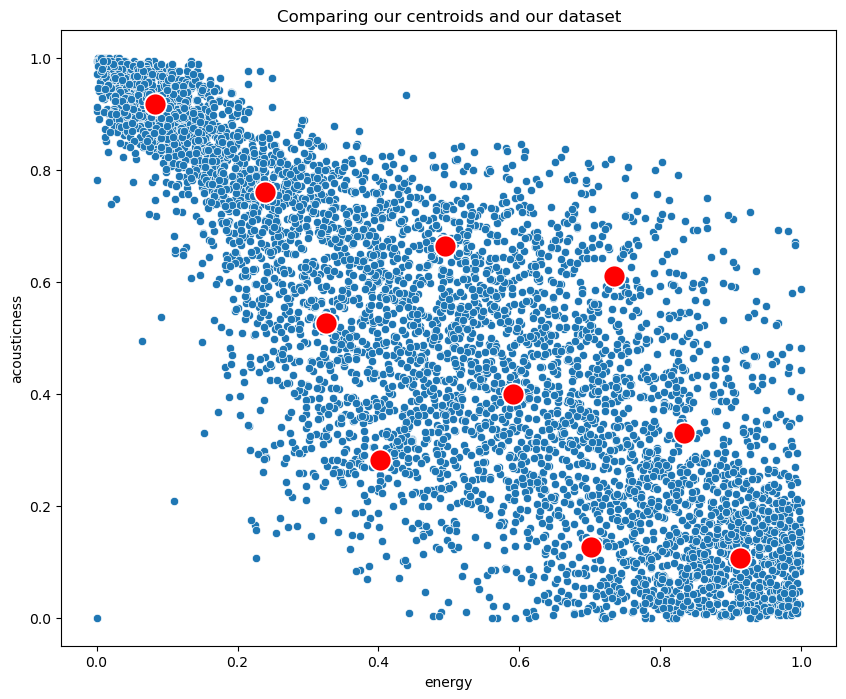

In [119]:
# Plot and explore our KMeans results

# First we plot with_age_quantile actualy scaled date with Quantile transformer

fig, ax = plt.subplots(figsize=(10, 8))
plot_data = pd.DataFrame(with_age_quantile)
plot_data.columns = ["energy","acousticness"]

# Second we plot centroids cl_pos within our plot with_age_quantile

plt.title('Comparing our centroids and our dataset')
plt.xlabel('energy')
plt.ylabel('acousticness')
sns.scatterplot(data=plot_data, x='energy', y='acousticness')
sns.scatterplot(data=cl_pos, x='energy', y='acousticness', color='red', s=250)
plt.show()

In [120]:
#Creatind data column "cluster" with number of 10 clusters and distribution of data from kmeans.labels_ to respective clusters.

moosic_5000songs['cluster'] = kmeans.labels_
moosic_5000songs.sample(5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,cluster
3716,To The Depths (In Degradation) ...,Infester,0.217,0.633,6,-12.445,1,0.0419,0.000310,0.875000,0.0674,0.342,76.803,,311000,5
252,A Message to You Rudy - 2002 Remastered Versio...,The Specials,0.423,0.266,4,-12.976,0,0.0583,0.735000,0.000011,0.1490,0.420,92.250,,274045,1
4291,Unholy Blasphemies ...,Morbid Angel,0.283,0.862,9,-10.588,1,0.1280,0.000005,0.388000,0.0931,0.263,124.194,,240333,7
2888,A Little More (feat. Sansa) ...,Kaskade,0.425,0.742,11,-5.098,0,0.0386,0.007720,0.000770,0.1120,0.215,127.978,,233400,5
4786,Helden gesucht - Single Version ...,Thomas Godoj,0.561,0.905,2,-2.628,1,0.0356,0.096700,0.000026,0.3280,0.560,115.921,,226213,9


In [121]:
# Make new data frame moosic_5000songs_genre to save the previuos from errors

moosic_5000songs_genre = moosic_5000songs
moosic_5000songs_genre

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,cluster
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,1
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,6
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,3
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,4
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4


In [122]:
# Append coloumn "type" based on the column cluster value using following genre clasification, USER DEFINED INPUTS (defined based on the scater plot bellow Visualizing the clusters)
# pop  = 7
# rock  = 3
# jazz = 2
# classic = 5
# rap = 4
# soul = 6
# blouse = 1
# new age = 8
# modern = 0
# relax = 9


# Define a mapping from integers(cluster) to text (type)
mapping = {0: 'modern', 1: 'blouse', 2: 'jazz', 3: 'rock', 4: 'rap', 5: 'classic', 6: 'soul', 7: 'pop', 8: 'new age', 9: 'relax'}

# Function to map integer values to text
def map_integer_to_text(integer_value):
    return mapping.get(integer_value, 'Unknown')

# Use the apply function to create a new text column based on the mapping
moosic_5000songs_genre['type'] = moosic_5000songs_genre['cluster'].apply(map_integer_to_text)

In [123]:
moosic_5000songs_genre.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,cluster
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,blouse,256213,1
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,soul,191867,6
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,rock,152267,3
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,rap,186227,4
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,rap,273680,4


# Data frame and clusters analysis

In [124]:
# group data by clusters/type to check number of data entries/songs in each type/cluster (genre) check size of the clusters

moosic_5000songs_genre = moosic_5000songs.groupby(by="cluster").count()
moosic_5000songs_genre

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms
cluster,,,,,,,,,,,,,,,
0,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708
1,658,658,658,658,658,658,658,658,658,658,658,658,658,658,658
2,548,548,548,548,548,548,548,548,548,548,548,548,548,548,548
3,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483
4,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830
5,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377
6,471,471,471,471,471,471,471,471,471,471,471,471,471,471,471
7,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432
8,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404


In [125]:
# group data by type/clusters to check number of data entries/songs in each type/cluster (genre) check size of the clusters
moosic_5000songs.groupby(by="type").count()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
type,,,,,,,,,,,,,,,
blouse,658,658,658,658,658,658,658,658,658,658,658,658,658,658,658
classic,377,377,377,377,377,377,377,377,377,377,377,377,377,377,377
jazz,548,548,548,548,548,548,548,548,548,548,548,548,548,548,548
modern,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708
new age,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404
pop,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432
rap,830,830,830,830,830,830,830,830,830,830,830,830,830,830,830
relax,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324
rock,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483


In [126]:
# Plot clusters number of artists based on genre clasification to check structure of the clusters playing list genre in order to potentialy propose importing new melodies to client

# First, create moosic_5000songs_artist_dictionary
moosic_5000songs_artist_dictionary = {
    'Cluster': [0,1,2,3,4,5,6,7,8,9],
    'Artist': [548,484,725,821,430,462,400,327,380,658]}

In [127]:
moosic_5000songs_artist_dictionary

{'Cluster': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'Artist': [548, 484, 725, 821, 430, 462, 400, 327, 380, 658]}

In [128]:
# Create data frame to plot it
moosic_5000songs_artist = pd.DataFrame(moosic_5000songs_artist_dictionary)
moosic_5000songs_artist

,Cluster,Artist
0,0,548
1,1,484
2,2,725
3,3,821
4,4,430
5,5,462
6,6,400
7,7,327
8,8,380
9,9,658


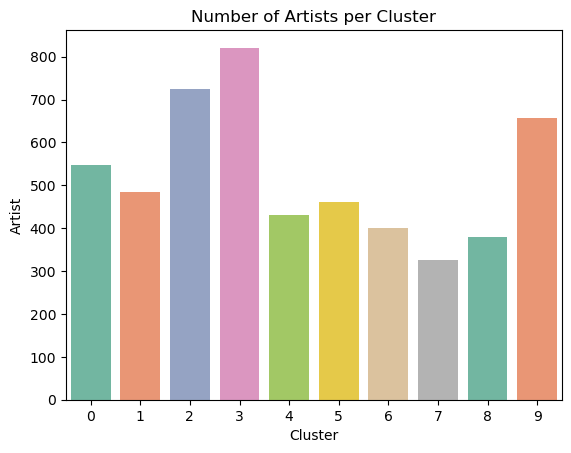

In [129]:
# Create a DataFrame for plotting
plot_moosic_5000songs_artist = pd.DataFrame(moosic_5000songs_artist)

# Set plot titles and labels
plt.title('Number of Artists per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Artist')

# Create a bar plot using the Cluster as x and 'Artist' as y
sns.barplot(data=plot_moosic_5000songs_artist, x=plot_moosic_5000songs_artist.index, y='Artist', palette='Set2')
plt.show()

In [130]:
# Additional artist should be included in the clusters with lower number of artist i.e. cluster # soul = 6 # pop = 7

# Visualizing the clusters in a scatterplot with K-means features x="energy", y="acousticness"

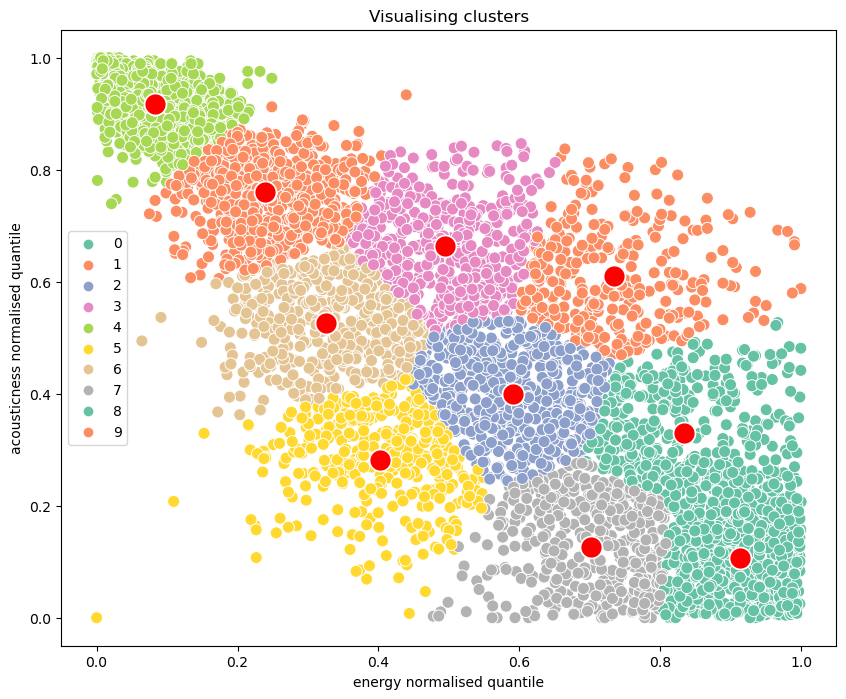

In [131]:
# Ploting original clustered dataframe with two values data
plot_data = pd.DataFrame(with_age_quantile)
plot_data.columns = ['energy', 'acousticness']
plot_data['cluster'] = kmeans.labels_

# size and plot titles
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel('energy normalised quantile')
plt.ylabel('acousticness normalised quantile')

# scatter plot
sns.scatterplot(data=plot_data, x='energy', y='acousticness', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='energy', y='acousticness', color='red', s=250)

plt.show()

In [132]:
#Checking mean between different clusters in order to compare it with the centroids value

moosic_5000songs_genre.groupby(by="cluster").mean()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms
cluster,,,,,,,,,,,,,,,
0,708.0,708.0,708.0,708.0,708.0,708.0,708.0,708.0,708.0,708.0,708.0,708.0,708.0,708.0,708.0
1,658.0,658.0,658.0,658.0,658.0,658.0,658.0,658.0,658.0,658.0,658.0,658.0,658.0,658.0,658.0
2,548.0,548.0,548.0,548.0,548.0,548.0,548.0,548.0,548.0,548.0,548.0,548.0,548.0,548.0,548.0
3,483.0,483.0,483.0,483.0,483.0,483.0,483.0,483.0,483.0,483.0,483.0,483.0,483.0,483.0,483.0
4,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0,830.0
5,377.0,377.0,377.0,377.0,377.0,377.0,377.0,377.0,377.0,377.0,377.0,377.0,377.0,377.0,377.0
6,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0,471.0
7,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0,432.0
8,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0


In [133]:
with_age_quantile.describe()

,energy,acousticness,cluster
count,5235.000000,5235.000000,5235.000000
mean,0.500003,0.500004,3.897994
std,0.288758,0.288769,2.784569
min,0.000000,0.000000,0.000000
25%,0.250096,0.250000,1.000000
50%,0.500191,0.500000,4.000000
75%,0.749809,0.750000,6.000000
max,1.000000,1.000000,9.000000


In [134]:
# Comparing means and  centroids values which should look similar. The centroids have been already computed in by our kmeans model

# 0 column = energy and 1 column = accusticness

centroids = kmeans.cluster_centers_
pd.DataFrame(centroids)

,0,1
0,0.912873,0.106055
1,0.239465,0.759716
2,0.590471,0.398765
3,0.494869,0.664534
4,0.083094,0.917959
5,0.402699,0.281817
6,0.325756,0.525949
7,0.702384,0.126807
8,0.834264,0.330028
9,0.733824,0.610229


In [135]:
moosic_5000songs.groupby(by="cluster").sum()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,,,
0,192.2234,683.666000,3943,-4763.361,485,88.0586,0.091308,340.306180,141.2234,147.0216,86627.301,179125656
1,384.0098,291.239000,3371,-6969.744,451,40.4772,389.451000,67.458012,113.9177,364.2647,77664.696,157351475
2,354.8160,436.191000,2689,-3094.323,326,46.9649,23.284490,32.760642,109.9147,320.5103,66863.761,124064355
3,316.1780,352.101000,2477,-3141.308,315,46.3941,171.095000,17.137665,96.9927,316.1475,56514.200,108952820
4,299.1768,111.288302,4263,-16888.152,543,38.0101,778.753000,487.187417,122.5691,174.9189,87714.022,252885571
5,226.0513,244.060000,2033,-2978.361,229,31.0097,3.890014,58.930004,60.4746,177.6638,46205.582,92699330
6,319.8460,266.662900,2538,-3831.667,294,38.3820,61.298300,17.306841,72.1480,273.3436,55577.310,108619703
7,146.9032,373.837000,2195,-3625.518,284,36.1918,0.159731,215.882593,83.1623,141.7192,52599.434,108978095
8,218.3167,376.593000,2222,-1988.862,248,39.2563,8.019847,88.989394,99.8857,188.8897,51698.922,94341391


In [136]:
# EXPLORE RELATION BETWEEN SUM OF ENERGY AND ACUSTICNESS

# Group by "cluster" and calculate the sum, then sort by "energy" in ascending order

moosic_5000songs_sum_energy_acustic_quantile = with_age_quantile.groupby(by="cluster").sum().sort_values(by="energy", ascending=True)
moosic_5000songs_sum_energy_acustic_quantile

,energy,acousticness
cluster,,
4,68.967743,761.906286
5,151.770634,106.109893
6,153.031716,247.910203
1,157.567921,499.893103
9,237.758980,197.714081
3,238.982232,321.106611
7,303.223443,55.171449
2,322.857184,219.289454
8,337.042606,133.331391


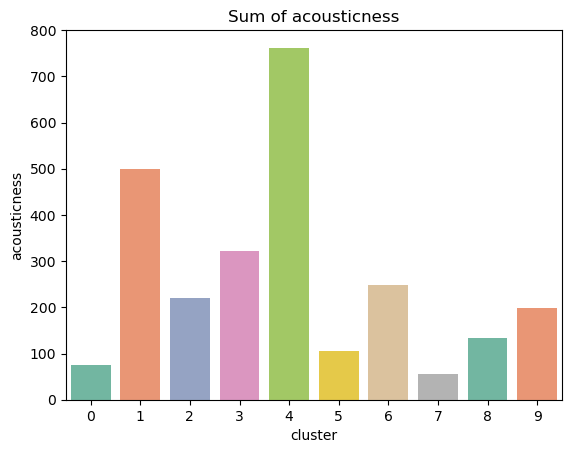

In [137]:
# Set plot titles and labels for ploting SUM OF ENERGY AND ACUSTICNESS
plt.title('Sum of acousticness')
plt.xlabel('cluster')
plt.ylabel('acousticness')

# Create a bar plot using the Cluster as x and 'acousticness' as y
sns.barplot(data=moosic_5000songs_sum_energy_acustic_quantile, x=moosic_5000songs_sum_energy_acustic_quantile.index, y='acousticness', palette='Set2')
plt.show()

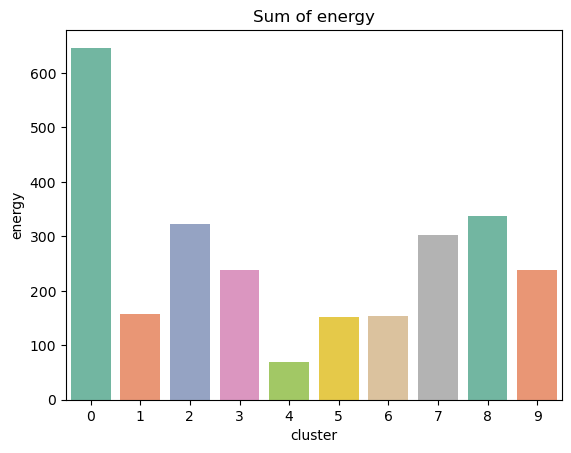

In [138]:
# Set plot titles and labels for ploting SUM OF ENERGY AND ACUSTICNESS
plt.title('Sum of energy')
plt.xlabel('cluster')
plt.ylabel('energy')

# Create a bar plot using the Cluster as x and 'acousticness' as y
sns.barplot(data=moosic_5000songs_sum_energy_acustic_quantile, x=moosic_5000songs_sum_energy_acustic_quantile.index, y='energy', palette='Set2')
plt.show()

In [36]:
# Coclussion for ploting SUM OF ENERGY AND ACUSTICNESS
# There is siginificant difference between clusters in term of energy and acusticness i.e.
# pop  = 7
# rock  = 3
# jazz = 2
# classic = 5
# rap = 4
# soul = 6
# blouse = 1
# new age = 8
# modern = 0
# relax = 9

# It generaly accepted opinion that today pop, new age and modern music is less acoustic and more energetic than in the 1950s https://www.theguardian.com/technology/2013/nov/25/pop-music-louder-less-acoustic
# Our anlises confirm this wide accepted opinion, but in order to prove it our data frame should be ammended with additonal coloumn "Song_year_created"

SyntaxError: invalid syntax (3505910742.py, line 13)